In [1]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib
from IPython.display import HTML

import torch
import torch.nn as nn
import torch.nn.functional as F

from src1.CNN import CNNActionValue
from src1.evaluate import evaluate
import src1.DQN as DQN
from src1.Preprocess import preprocess, ImageEnv

In [2]:
env = gym.make('CarRacing-v3', continuous=False)
print("Observation space: ", env.observation_space)
print("Action space: ", env.action_space)

Observation space:  Box(0, 255, (96, 96, 3), uint8)
Action space:  Discrete(5)


(96, 96, 3)


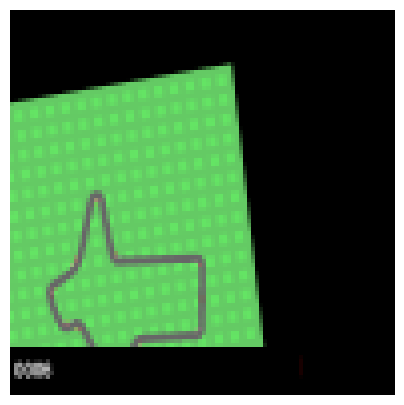

In [3]:
s, info = env.reset()
print(s.shape)

frames = []
for i in range(50):
    s, r, terminated, truncated, info = env.step(0)  # 0-th action is no_op action
    frames.append(s)

# Create animation
fig = plt.figure(figsize=(5, 5))
plt.axis('off')
im = plt.imshow(frames[0])
def animate(i):
    im.set_array(frames[i])
    return im,
anim = FuncAnimation(fig, animate, frames=len(frames))
HTML(anim.to_jshtml())

The shape of an observation:  (4, 84, 84)


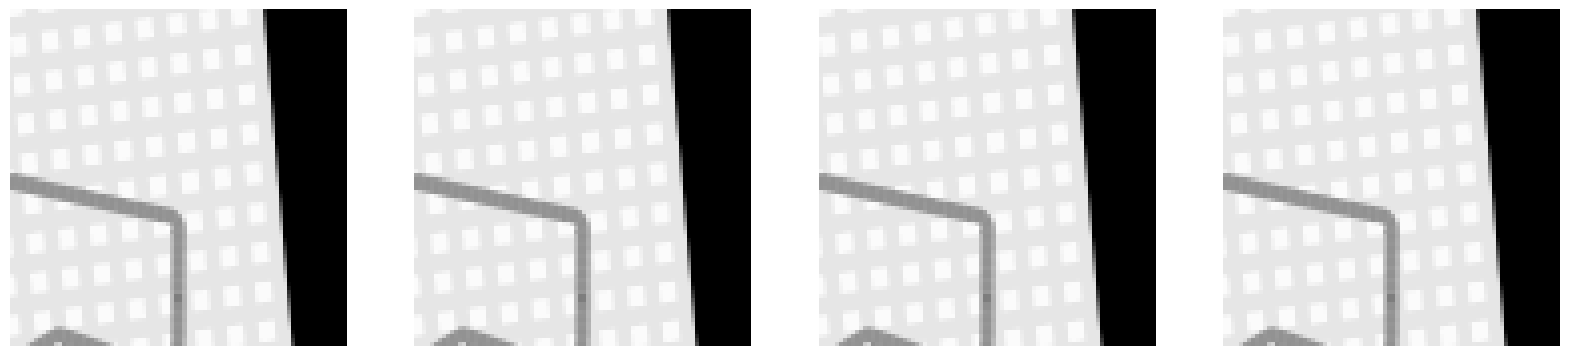

In [4]:
env = gym.make('CarRacing-v3', continuous=False)
env = ImageEnv(env)

s, _ = env.reset()
print("The shape of an observation: ", s.shape)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i in range(4):
    axes[i].imshow(s[i], cmap='gray')
    axes[i].axis('off')
plt.show()

In [5]:
env = gym.make('CarRacing-v3', continuous=False)
env = ImageEnv(env)

max_steps = int(1e4)
eval_interval = 100
state_dim = (4, 84, 84)
action_dim = env.action_space.n

agent = DQN.DQN(state_dim, action_dim)

MemoryError: Unable to allocate 10.5 GiB for an array with shape (100000, 4, 84, 84) and data type float32

In [ ]:
def evaluate(n_evals=5):
    eval_env = gym.make('CarRacing-v3', continuous=False)
    eval_env = ImageEnv(eval_env)
    
    scores = 0
    for i in range(n_evals):
        (s, _), done, ret = eval_env.reset(), False, 0
        while not done:
            a = agent.act(s, training=False)
            s_prime, r, terminated, truncated, info = eval_env.step(a)
            s = s_prime
            ret += r
            done = terminated or truncated
        scores += ret
    return np.round(scores / n_evals, 4)

In [ ]:
from IPython.display import clear_output

history = {'Step': [], 'AvgReturn': []}

(s, _) = env.reset()
while True:
    a = agent.act(s)
    s_prime, r, terminated, truncated, info = env.step(a)
    result = agent.process((s, a, r, s_prime, terminated))  # You can track q-losses over training from `result` variable.
    
    s = s_prime
    if terminated or truncated:
        s, _ = env.reset()
        
    if agent.total_steps % eval_interval == 0:
        ret = evaluate()
        history['Step'].append(agent.total_steps)
        history['AvgReturn'].append(ret)
        
        clear_output()
        plt.figure(figsize=(8, 5))
        plt.plot(history['Step'], history['AvgReturn'], 'r-')
        plt.xlabel('Step', fontsize=16)
        plt.ylabel('AvgReturn', fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.grid(axis='y')
        plt.savefig("AvgReturn03.jpg", dpi=300, bbox_inches='tight')
        plt.show()
        
        torch.save(agent.network.state_dict(), 'dqn.pt')
    
    if agent.total_steps > max_steps:
        break

In [ ]:
eval_env = gym.make('CarRacing-v3', continuous=False, render_mode='rgb_array')
eval_env = ImageEnv(eval_env)

frames = []
scores = 0
(s, _), done, ret = eval_env.reset(), False, 0
while not done:
    frames.append(eval_env.render())
    a = agent.act(s, training=False)
    s_prime, r, terminated, truncated, info = eval_env.step(a)
    s = s_prime
    ret += r
    done = terminated or truncated
scores += ret

In [ ]:
import matplotlib.animation as animation
fig = plt.figure()
ims = []

for frame in frames:
    im = plt.imshow(frame, animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True)

# 애니메이션을 저장
ani.save('car_racing_result_예비3.gif', writer='pillow')

plt.show()

In [ ]:
# !python --version


In [ ]:
# !pip install gymnasium[box2d]


In [ ]:
# !pip install gymnasium[box2d]
# !pip install matplotlib pygame


In [ ]:
# !pip install ipykernel
# python -m ipykernel install --user --name py310_env --display-name "Python 3.10 (CarRacing)"


In [ ]:
# !pip install ipykernel
# !python -m ipykernel install --user --name py310_env --display-name "Python 3.10 (CarRacing)"


In [ ]:
# !pip install gymnasium[box2d]


In [ ]:
# import sys
# print(sys.version)


In [ ]:
# conda remove -n py310_env --all      # 기존 환경 삭제 (선택)
# conda create -n py310_env python=3.10
# conda activate py310_env
# pip install gymnasium[box2d] matplotlib pygame ipykernel
# python -m ipykernel install --user --name py310_env --display-name "Python 3.10 (CarRacing)"



In [ ]:
# import gymnasium as gym

# env = gym.make("CarRacing-v3", render_mode="human")
# obs, info = env.reset()
# done = False

# while not done:
#     obs, reward, terminated, truncated, info = env.step(env.action_space.sample())
#     done = terminated or truncated
#     env.render()

# env.close()


In [ ]:
# import sys
# print(sys.executable)


In [ ]:
# !pip install matplotlib


In [ ]:
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation


In [ ]:
# import sys
# !{sys.executable} -m pip install matplotlib


In [ ]:
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation


In [ ]:
# !{sys.executable} -m pip install torch torchvision torchaudio


In [ ]:
# import torch
# print(torch.__version__)
# print(torch.cuda.is_available())  # GPU 사용 가능 여부


In [ ]:
# import cv2
# print(cv2.__version__)
